# Part I - Prosper Loan Dataset Exploration
### by MAAROUFI Sirine

## Introduction
>  The dataset we're going to use in this project is Loan Data from Prosper. This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
  




## Preliminary Wrangling

In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### Data Gathering

In [ ]:
# Load data
loan_data = pd.read_csv('prosperLoanData.csv')

#### Assessing Data

In [ ]:
# Display the first few lines
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [ ]:
# Get the shape of the data
loan_data.shape

(113937, 81)

In [ ]:
# Get data's infos
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [ ]:
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [ ]:
# Check for Missing values
loan_data.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

###### Quality Issues
* Missing values
* Incorrect Data types

##### Data Cleaning

In [ ]:
# Make a copy from the data
loan_data_clean = loan_data.copy()

##### Issue #1: Missing values

##### Define
* Drop columns with more than half of their values are missing.
* Drop rows with more than half of their values are missing.

##### Code

In [ ]:
# Drop columns with more than half of their values are missing
loan_data_clean.dropna(axis = 'columns', thresh = 113937*0.5, inplace= True)

In [ ]:
# Drop rows with more than half of their values are missing
loan_data_clean.dropna(axis = 'rows', inplace= True)

##### Test

In [ ]:
# Data's new shape
loan_data_clean.shape

(76216, 69)

In [ ]:
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

##### Issue #2: Incorrect Data types

##### Define
* Change Datetime variables' types from object to Datetime.

##### Code

In [ ]:
def obj_to_datetime(object):
    loan_data_clean[object] = loan_data_clean[object].astype('datetime64[ns]')

list_date_var = ['ListingCreationDate','LoanOriginationDate','DateCreditPulled','FirstRecordedCreditLine']
for var in list_date_var:
    obj_to_datetime(var)

##### Test

In [ ]:
loan_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 69 columns):
ListingKey                            76216 non-null object
ListingNumber                         76216 non-null int64
ListingCreationDate                   76216 non-null datetime64[ns]
Term                                  76216 non-null int64
LoanStatus                            76216 non-null object
BorrowerAPR                           76216 non-null float64
BorrowerRate                          76216 non-null float64
LenderYield                           76216 non-null float64
EstimatedEffectiveYield               76216 non-null float64
EstimatedLoss                         76216 non-null float64
EstimatedReturn                       76216 non-null float64
ProsperRating (numeric)               76216 non-null float64
ProsperRating (Alpha)                 76216 non-null object
ProsperScore                          76216 non-null float64
ListingCategory (numeric)           

### What is the structure of your dataset?

> The dataset contains 113937 rows and 81 columns. The columns are mostly numeric except a few of them.
    - ProsperRate, BorrowerState, Occupation, EmploymentStatus, LoanStatus, and CreditGrade are categorical.
    - IsBorrowerHomeowner, CurrentlyInGroup, and IncomeVerifiable are boolean.
    - ListingCreationDate, LoanOriginationDate, DateCreditPulled, and FirstRecordedCreditLine are Datetime.

### What is/are the main feature(s) of interest in your dataset?

> Prosper rating, interest rates, term, loan original amount are interessting features.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Analyzing credit score, employment status, income range, stated monthly income, loan category, and so on can help better understand main factors.


## Univariate Exploration

> In this section, I'm gonna explore borrower related variables.


###### Question #1
> What's the term chosen by borrowers?

###### Visualization

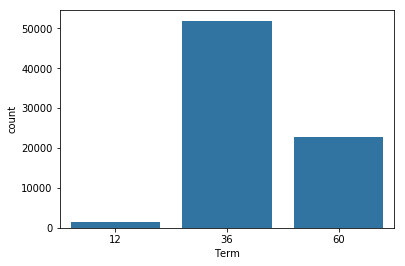

In [ ]:
default_color = sb.color_palette()[0]
sb.countplot(data = loan_data_clean, x = 'Term', color = default_color);

###### Observation
> It seems like borrowers prefer the 36 term.

##### Question #2
> What's the range of BorrowerRate?

##### Visualization

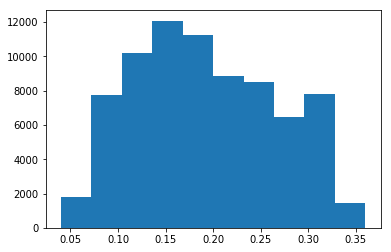

In [ ]:
plt.hist(data = loan_data_clean, x = 'BorrowerRate');

##### Observation
> BorrwerRate ranges from 0.05 to 0.35.

##### Question #3:
> what are the levels of prosper ratings available and what is the most common rating given to borrowers?

##### Visualization

In [ ]:
loan_data_clean['ProsperRating (Alpha)'].value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating (Alpha), dtype: int64

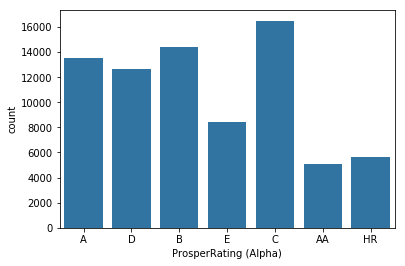

In [ ]:
sb.countplot(data = loan_data_clean, x = 'ProsperRating (Alpha)', color = default_color);

##### Observation
>   The most common prosper ratings are A,B,C, and D.


##### Question #4
>  For what purpose borrowers are taking loans?

##### Visualization

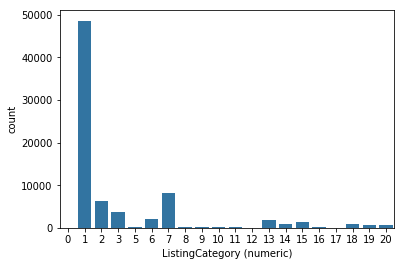

In [ ]:
sb.countplot(data = loan_data_clean, x = 'ListingCategory (numeric)', color = default_color);

##### Observation
> It seems like most borrowers take loans for the purpose of Debt consolidation

##### Question #5
> How are borrowers geographically distributed?

##### Visualization

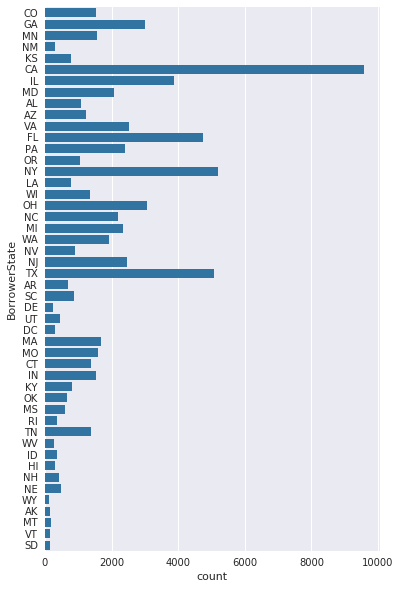

In [ ]:
sb.set(rc={"figure.figsize":(6, 10)}) #width=8, height=4
sb.countplot(data = loan_data_clean, y = 'BorrowerState', color = default_color);

##### Observation
> Mostly used states are CA, FL, GA, IL, NY, and TX.

##### Question #6
> What's the range of loan amounts the borrowers are requesting?

##### Visualization

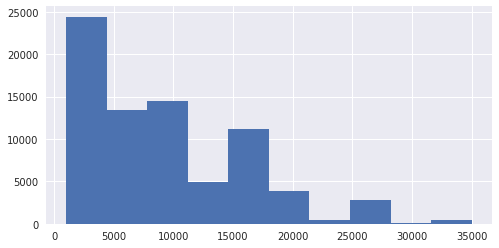

In [ ]:
sb.set(rc={"figure.figsize":(8, 4)}) #width=8, height=4

plt.hist(data = loan_data_clean, x = 'LoanOriginalAmount');

##### Observation
> the range is from 1000 to 35000.

##### Question #7
> What the range of the borrowers stated monthly income?

##### Visualization

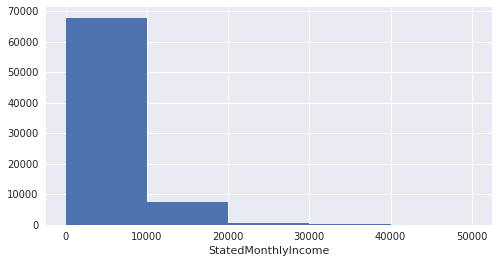

In [ ]:
x = loan_data_clean.StatedMonthlyIncome
plt.hist(data = loan_data_clean, x = 'StatedMonthlyIncome', bins = [0,10000,20000,30000,40000,50000]);
plt.xlabel('StatedMonthlyIncome');

##### Observation
> The range is from 0 to 40000.

##### Question #8
> From which range of income most borrowers are?

##### Visualization

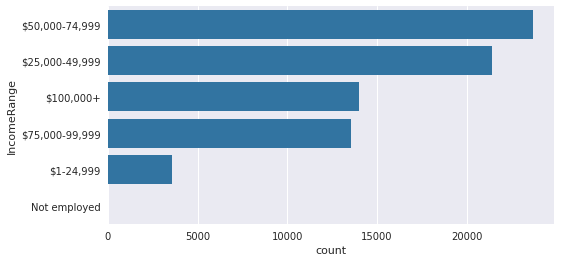

In [ ]:
sb.countplot(data = loan_data_clean, y = 'IncomeRange', color = default_color);

##### Observation
> Most people with the income range from 25,000-74,999 took loans.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### Question #9
> how are the variables correlated?

##### Visualization

In [ ]:
numeric_vars = loan_data_clean._get_numeric_data().columns
numeric_vars

Index(['ListingNumber', 'Term', 'BorrowerAPR', 'BorrowerRate', 'LenderYield',
       'EstimatedEffectiveYield', 'EstimatedLoss', 'EstimatedReturn',
       'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'CurrentlyInGroup',
       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines',
       'OpenCreditLines', 'TotalCreditLinespast7years',
       'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment',
       'InquiriesLast6Months', 'TotalInquiries', 'CurrentDelinquencies',
       'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'AvailableBankcardCredit', 'TotalTrades',
       'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months',
       'DebtToIncomeRatio', 'IncomeVerifiable', 'StatedMonthlyIncome',
       'LoanCurrentDaysDelinquent', 'LoanMonthsSinceOrigin

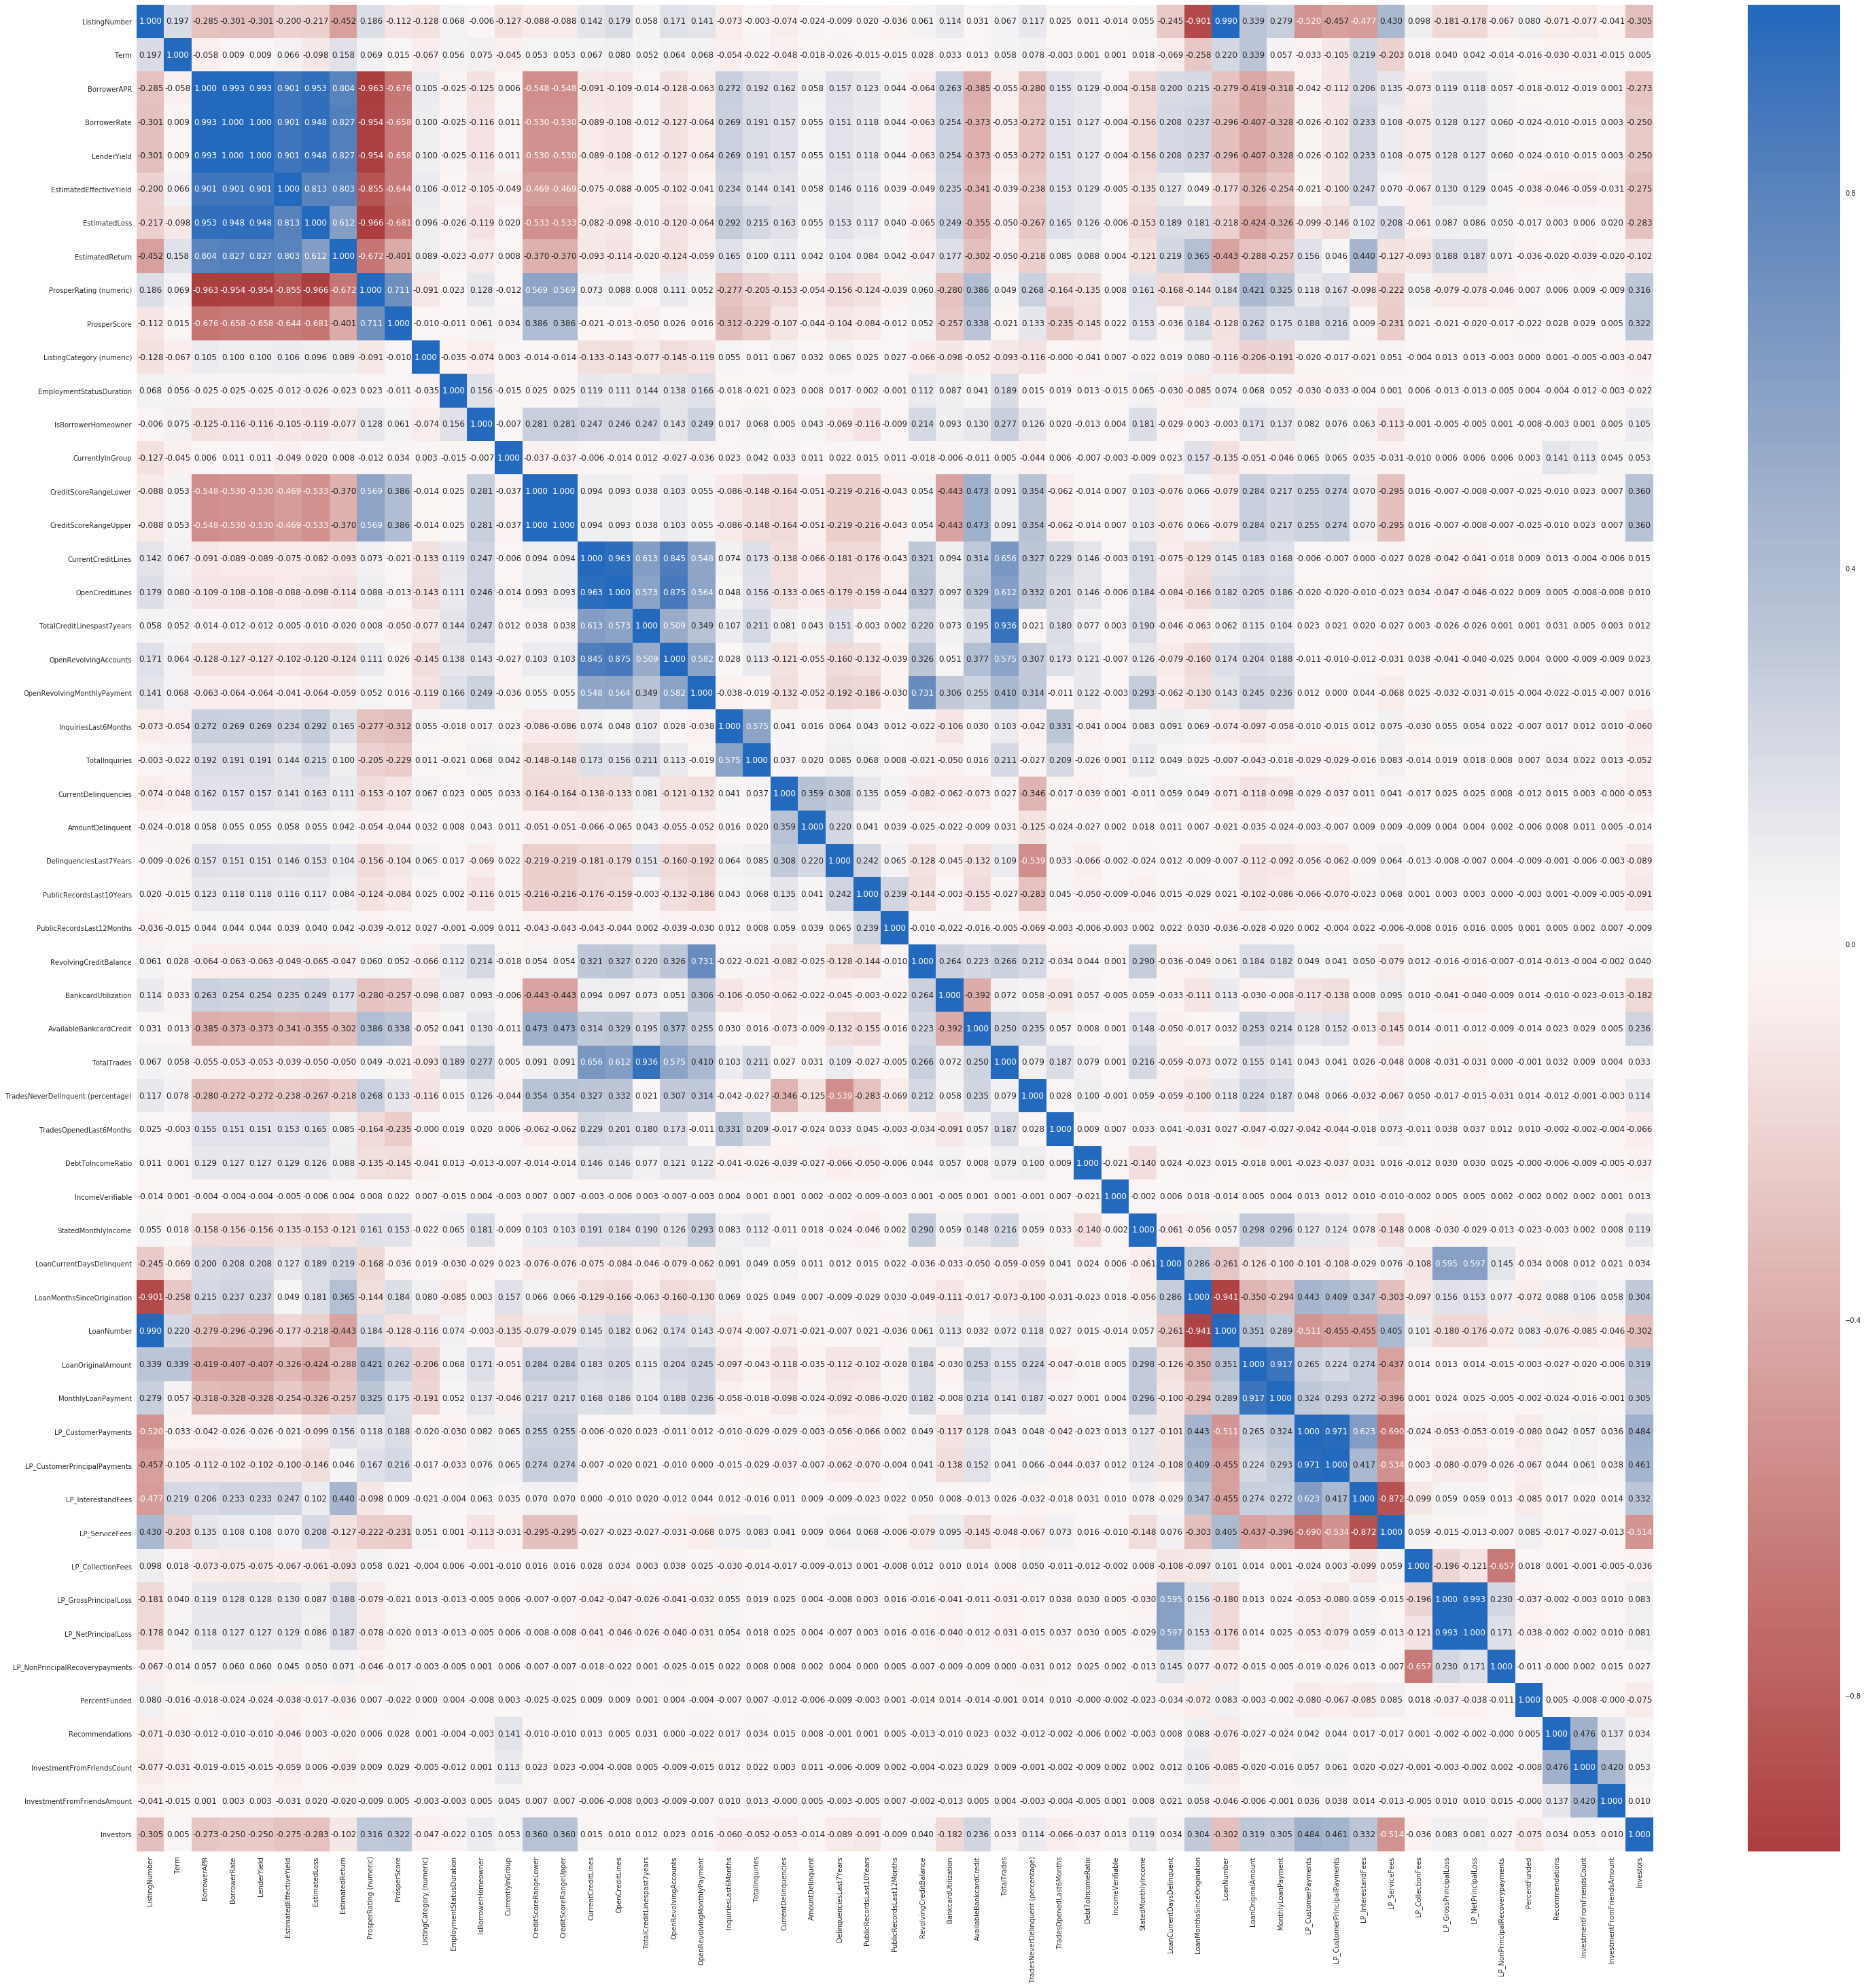

In [ ]:
# correlation plot
plt.figure(figsize = [50, 50])
sb.heatmap(loan_data_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

##### Observation
> ProsperScore, ProsperRating,EstimatedReturn, EstimatedLoss, EstimatedEffectiveYield, LenderYield, BorrowerRate, and BorrowerAPR are strongly correlated between each other.


##### Question #10
> What's the relationship between BorrowerAPR and Prosper Rating?

##### Visualization

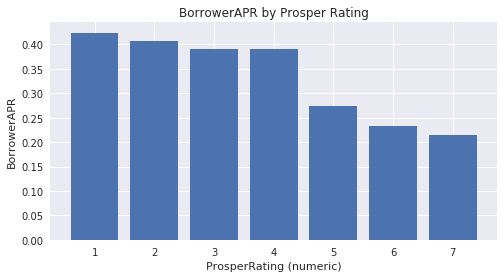

In [ ]:
plt.figure(figsize = [8, 6])
x = loan_data_clean['ProsperRating (numeric)']
y = loan_data_clean['BorrowerAPR']
plt.bar(x,y);
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('BorrowerAPR')
plt.title('BorrowerAPR by Prosper Rating')
plt.show()

##### Observation
> Borrower's APR is highly dependent on proper rating. We can see that BorrowerAPR is increasing as prosper rating decreasing.

##### Question #11
> What's the relationship between BorrowerAPR and Prosper Rating?

##### Visualization

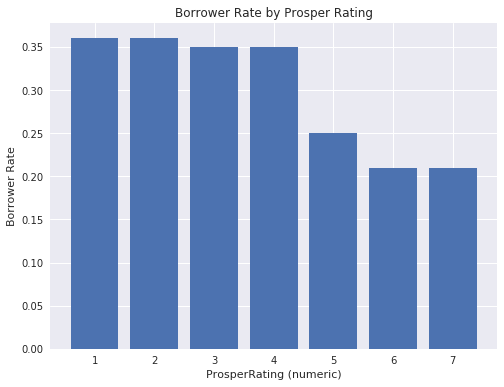

In [ ]:
plt.figure(figsize = [8, 6])
x = loan_data_clean['ProsperRating (numeric)']
y = loan_data_clean['BorrowerRate']
plt.bar(x,y);
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('Borrower Rate')
plt.title('Borrower Rate by Prosper Rating')
plt.show()

##### Observation
> Borrower's rate is highly dependent on proper rating. We can see that BorrowerRate is increasing as prosper rating decreasing.

##### Question #12
> What's the relationship between LoanOriginalAmount and Prosper Rating?

##### Visualization

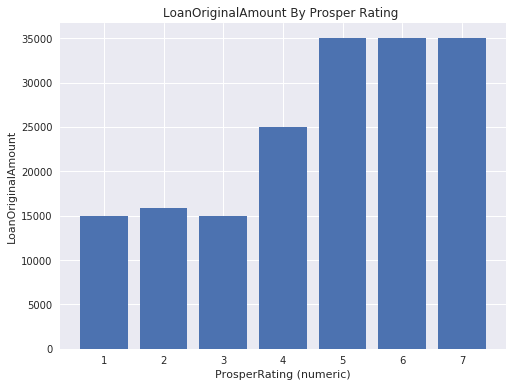

In [ ]:
plt.figure(figsize = [8, 6])
x = loan_data_clean['ProsperRating (numeric)']
y = loan_data_clean['LoanOriginalAmount']
plt.bar(x,y);
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount By Prosper Rating ')
plt.show()

##### Observation
> ProsperRating is highly dependent on LoanOriginalAmout . We can see that ProsperRating rate is increasing as LoanOriginalAmout increasing.

##### Question #13
> What's the relationship between LoanOriginalAmount and CreditScoreRange?

##### Visualization

In [ ]:
loan_data_clean['CreditScoreRange'] = loan_data_clean['CreditScoreRangeUpper'] - loan_data_clean['CreditScoreRangeLower']

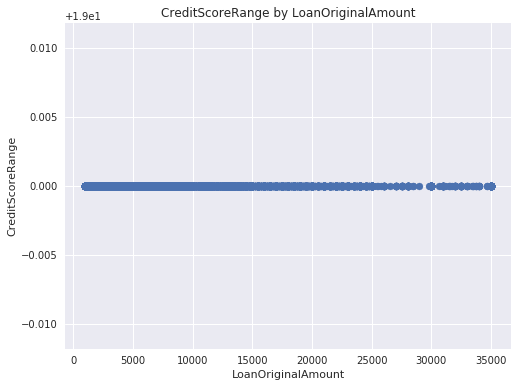

In [ ]:
plt.figure(figsize = [8, 6])
plt.scatter(data = loan_data_clean, y = 'CreditScoreRange', x = 'LoanOriginalAmount');
plt.ylabel('CreditScoreRange')
plt.xlabel('LoanOriginalAmount')
plt.title('CreditScoreRange by LoanOriginalAmount')
plt.show()

##### Observation
> The CreditScoreRange is constant.

##### Question #14
> What's the relationship between Emploment Status and LoanOriginalAmount?

##### Visualization

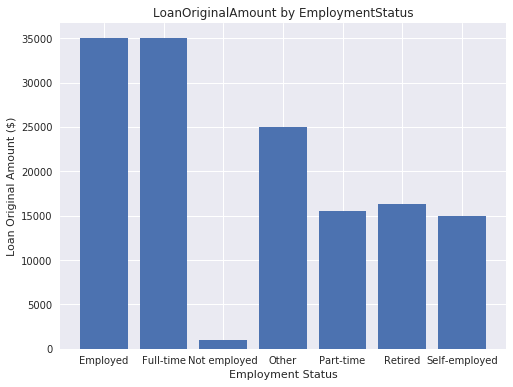

In [ ]:
plt.figure(figsize = [8, 6])
y = loan_data_clean['LoanOriginalAmount']
x = loan_data_clean['EmploymentStatus']
plt.bar(x,y);
plt.ylabel('Loan Original Amount ($)')
plt.xlabel('Employment Status')
plt.title('LoanOriginalAmount by EmploymentStatus')
plt.show()

##### Observation
> Employed people and Full-time workers tend to request more money than the others.

### Talk about some of the relationships you observed in this part of the investigation.

> ProsperScore, ProsperRating,EstimatedReturn, EstimatedLoss, EstimatedEffectiveYield, LenderYield, BorrowerRate, and BorrowerAPR are strongly correlated between each other.

>ProsperRating is highly dependent on LoanOriginalAmount.

>BorrowerRate and BorrowerAPR are dependent on ProsperRating.

>LoanOriginalAmount is dependent on EmploymentStatus.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> CreditScoreRange is constant

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

##### Question #15
> How ProsperRating and BorrowerRate influence LoanOriginalAmount?

##### Visualization

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


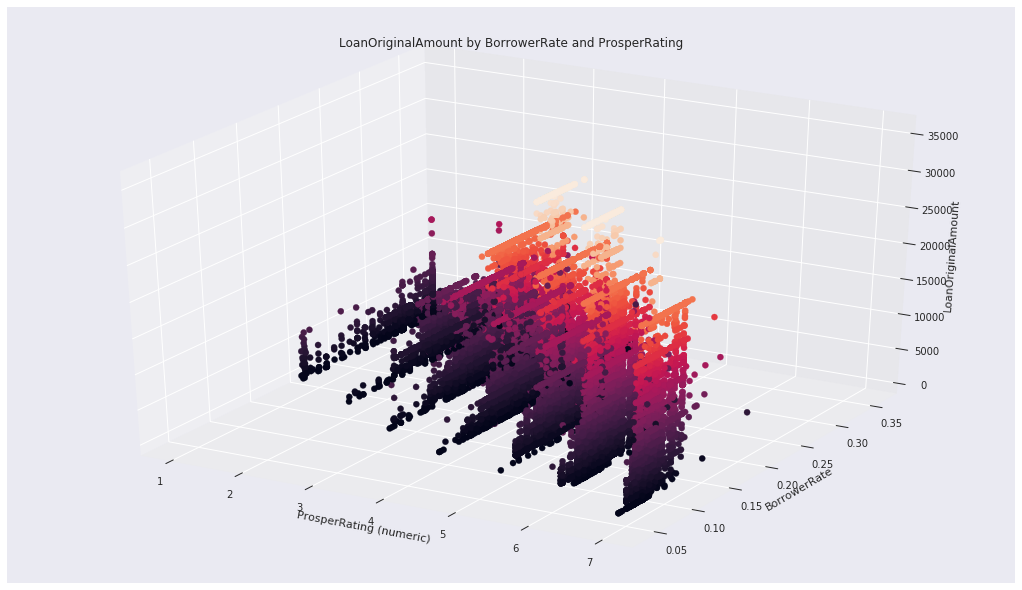

In [ ]:
# LoanOriginalAmount by BorrowerRate and ProsperRating
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [14.00, 8.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = Axes3D(fig)
x = loan_data_clean['ProsperRating (numeric)']
y = loan_data_clean.BorrowerRate
z = loan_data_clean.LoanOriginalAmount
ax.scatter3D(x, y, z, c=z, alpha=1, marker='.', s=150);
plt.xlabel('ProsperRating (numeric)')
plt.ylabel('BorrowerRate')
ax.set_zlabel('LoanOriginalAmount')
plt.title('LoanOriginalAmount by BorrowerRate and ProsperRating')
plt.show();

##### Observation
> Borrowers who have good prosper rating have an opportunity to avail lower borrower rates and at the same time, they can take higher loans.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Borrowers who have good prosper rating have an opportunity to avail lower borrower rates and at the same time, they can take higher loans.




## Conclusions
> Borrowers who have good prosper rating have an opportunity to avail lower borrower rates and at the same time, they can take higher loans.

> ProsperScore, ProsperRating,EstimatedReturn, EstimatedLoss, EstimatedEffectiveYield, LenderYield, BorrowerRate, and BorrowerAPR are strongly correlated between each other.

> ProsperRating is highly dependent on LoanOriginalAmount.

> BorrowerRate and BorrowerAPR are dependent on ProsperRating.

> LoanOriginalAmount is dependent on EmploymentStatus.